## EDA

The EDA section is broken down into three categories: Word Count, Top Words, and Sentiment Analysis. I will also be evaluating the outliers to see their importance to the project. For project cohesiveness, orange plots are for the PS subreddit (r/PS4), and blues are for the Xbox (r/xboxone). Lastly, all functions used in this project are in the function.py script. 

In [2]:
#Imported Libaries
import pandas as pd 
import seaborn as sns 
import function as func
from textblob import TextBlob
import matplotlib.pyplot as plt 
import autoreload
%load_ext autoreload
%autoreload 2

#Load data
combine = pd.read_csv('../datasets/cleaned_data.csv')
org_data = pd.read_csv('../datasets/tokenize_data.csv')

--- 

### Word Count Analysis

The code block below will first create a new column called `word_count`, which is the sum of all the words in a post. I then separated the data into two dataframes, one only containing posts from the Xbox subreddit the other from PS, and examined their outliers. Afterward, I compared the distribution of `word_count` between the two subreddits. I decided to look at word count because it is a straightforward method to see the differences between the two subreddits. 

In [13]:
#Separates data into two dataframes (xbox and ps) and add new column called word_count
xbox, ps = func.word_count(combine)
print('Xbox Descriptive Statistics')
print(xbox['word_count'].describe())
print()
print('PS Descriptive Statistics')
print(ps.word_count.describe())

Xbox Descriptive Statistics
count    9991.000000
mean       45.476329
std        70.350191
min         1.000000
25%         9.000000
50%        27.000000
75%        59.000000
max      1955.000000
Name: word_count, dtype: float64

PS Descriptive Statistics
count    9982.000000
mean       45.835404
std        86.135341
min         1.000000
25%         8.000000
50%        22.000000
75%        60.000000
max      3561.000000
Name: word_count, dtype: float64


In [14]:
#Outliers from xbox's word_count
xbox.loc[xbox['word_count'] >= 1000].sort_values('word_count', ascending=False).head()

,selftext,title,subreddit,text,word_count
4003,"Hi all, \n\n\nI wanted to write this as I've ...",Racism on Xbox/Sea Of Thieves. My Report and t...,0,racism on sea of thief my report and the subse...,1955
7299,"In the past, I have seen many people answer t...",How to Tell if a Someone is using Mouse and Ke...,0,how to tell if a someone is using mouse and ke...,1683
7449,"In the past, I have seen many people answer th...",How to Tell if a Someone is using Mouse and Ke...,0,how to tell if a someone is using mouse and ke...,1675
7588,######This post will be updated regularly on /...,Upcoming/Recent Xbox Releases,0,upcomingrecent release this post will be updat...,1414
9567,Hey guys! I have a story for you! What I said ...,Serious issue!,0,serious issue hey guy i have a story for you w...,1347


In [15]:
#Outliers from ps's word_count
ps.loc[ps['word_count'] >= 1000].sort_values('word_count', ascending=False).head()

,selftext,title,subreddit,text,word_count
11286,\nGame Information\n--------------------\n\n**...,Ghost of Tsushima for PS4 Reviews - OpenCritic,1,ghost of tsushima for review opencritic game i...,3561
18587,\n\n**This is an extremely long post. No TLDR ...,Why I didn’t like The Last of Us Part II,1,why i didn t like the last of u part ii this i...,2715
14271,"To begin, I remember playing TLOU on opening w...",How I Wish TLOU II's Story Played Out - Spoile...,1,how i wish tlou ii story played out spoiler wa...,2257
17470,"*This is long, and I’m no poet or writer, but ...",[SPOILER] [TLOU2] My review of TLOU2; the stor...,1,my review of tlou the story we did not expect ...,1805
15334,Jackson and the residents there are the only g...,"[Spoilers] In my OPINION, Joel and Ellie's act...",1,in my opinion joel and ellies action are still...,1292


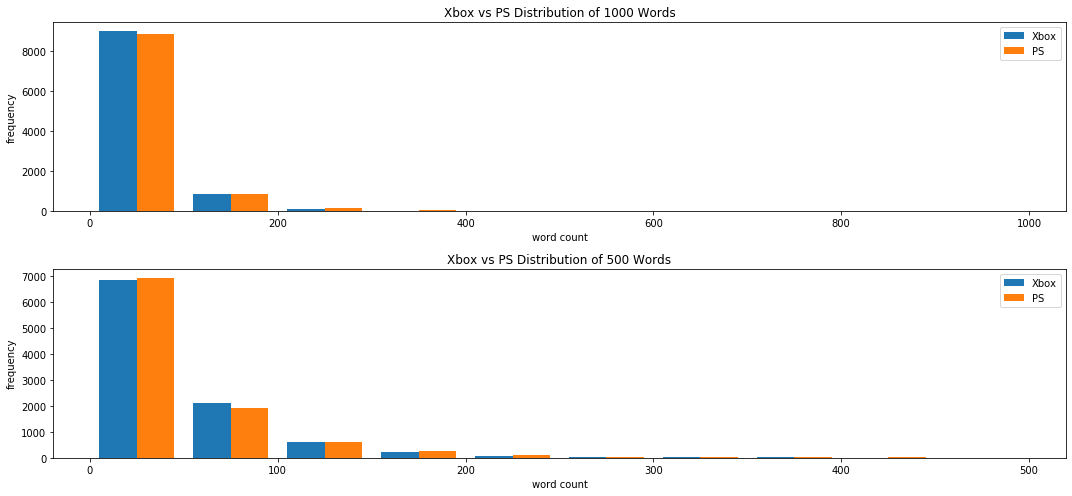

In [18]:
#Visualizes the distribution of word count per subreddit group
func.dist_word_count(xbox, ps)

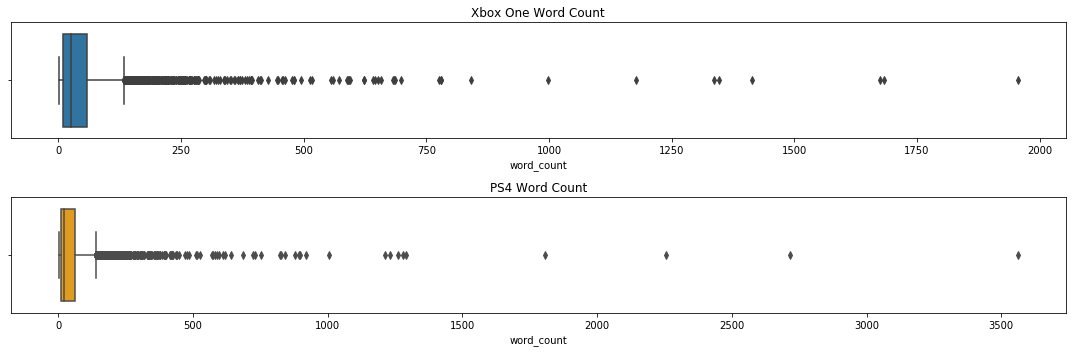

In [19]:
#Visualizes the distribution using a box plot
func.box_word_count(xbox,ps)

#### Findings: 
- The average word count for both subreddit groups is 45 words/post, where most posts contain 50 words or less.
- PS subreddit has more posts with 50 words or less, while Xbox has more wordy posts between 50-100 words.
- Both subreddits have a right-tail skewed distribution with plenty of outliers. The longest post is at the PS subreddit with 3561 words, which is a game review. Since it appears that longer posts are game reviews, I decided to keep them to help with the modeling process. 
- An interesting observation from the PS outliers is that they are about popular games for the PS platform: The Last of Us and Ghost of Tsushima. 

---

### Top Words Analysis

I decided to examine the top words to understand the different terms commonly associated with each platform. It will give a good insight into the kind of post that exists between the subreddits. I first separated the document-term matrix into two dataframes, one containing words found in the PS subreddit while the other for Xbox. I then summed their word occurrences and sorted them in descending order. For visualization, I did a bar plot and a box plot (orange = PS and blue = Xbox). 

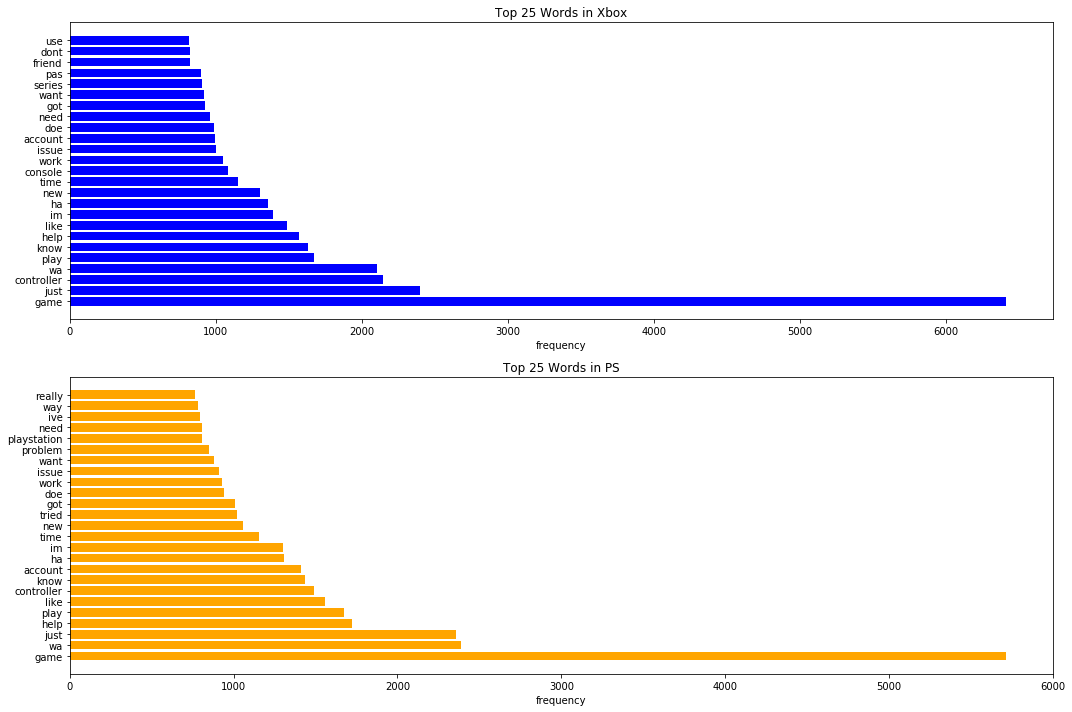

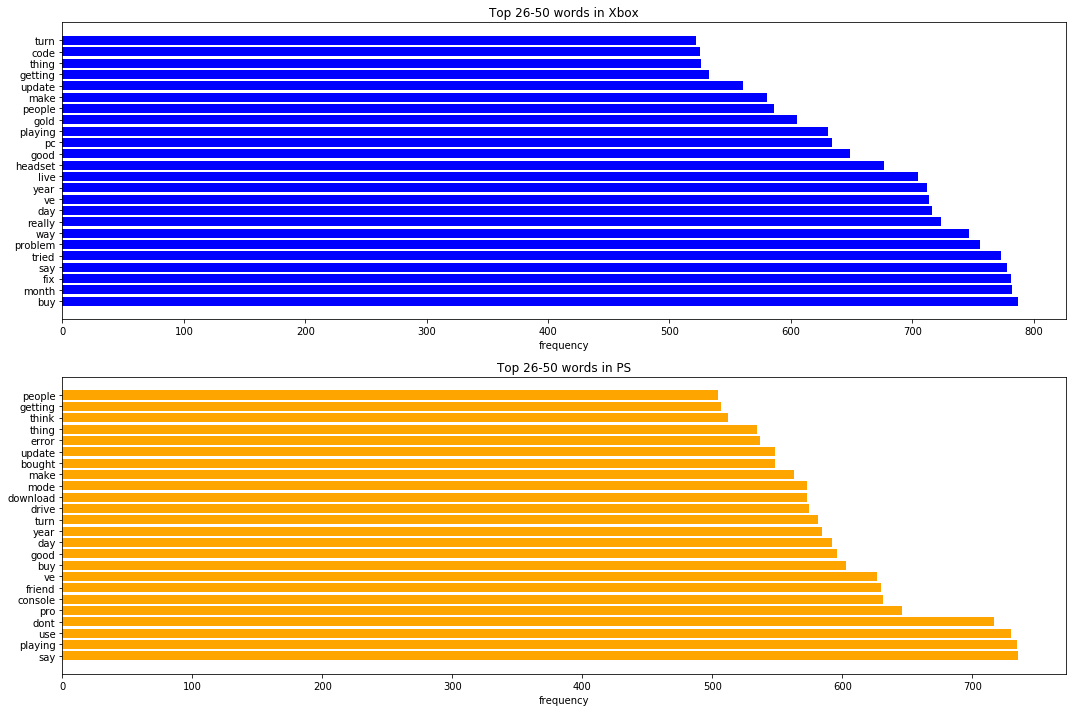

In [24]:
xbox_org, ps_org = func.separate(org_data)
xbox_top = func.top_words(xbox_org)
ps_top = func.top_words(ps_org).drop(0) #drops 'subreddit' column

#Top 25 words 
func.bar_plot([xbox_top, ps_top], ['Top 25 Words in Xbox', 'Top 25 Words in PS'], 0, 25, ['blue', 'orange'])

#Top 26-50 words 
func.bar_plot([xbox_top, ps_top], ['Top 26-50 words in Xbox', 'Top 26-50 words in PS'], 26,50, ['blue', 'orange'])

#### Findings: 
- In both subreddits, the word "game" dominates. Additionally, it seems that most posts are questions about troubleshooting issues or problems.
- As expected, we see top words such as pass, live, and gold on the Xbox subreddit. These terms are associated with the Xbox online platform. 
- For the PS subreddit, the unique term that stood out was pro. This word can be related to the Playstation 4 Pro console. Like Xbox, I expected this observation since this console is relatively new and is currently being discussed in the community due to its upgrades. 

### Sentiment Analysis
I conducted a sentiment analysis to see if there is a difference between subreddit's attitudes. For this project, I decided to focus on the post's polarity and subjectivity. 
- **Polarity:** determines how negative or positive a post is (Scale from -1 to 1).
- **Subjectivity:** differentiate between subjective and objective post. Subjective posts are ones that are influenced by feelings or opinions, while objective posts are fact-driven.
    - The scaled is from 0 to 1, where posts with a score of 0 are objective. 

To calculate the sentiment metrics, I used a library called TextBlob. The final results are visualized below. 

Average Xbox polarity: 0.012344575331767442
Average PS polarity: 0.019887416894036416


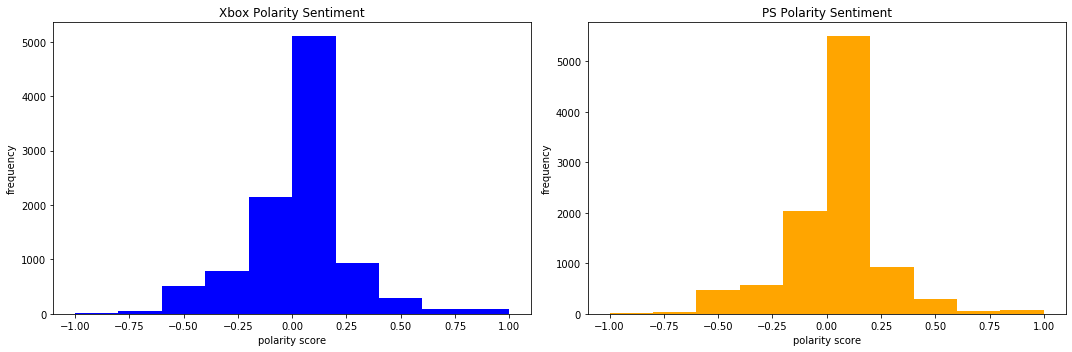

In [31]:
#Calculates polarity and subjetivity scores
xbox_1 = func.sentiment_measure(xbox)
ps_1 = func.sentiment_measure(ps)

#Calculates the mean of the polarity and subjectivity score 
xbox_pol_mean = xbox_1['polarity'].mean()
ps_pol_mean = ps_1['polarity'].mean()
print(f'Average Xbox polarity: {xbox_pol_mean}')
print(f'Average PS polarity: {ps_pol_mean}')

#Visualize the Polarity score
func.histogram([xbox_1, ps_1], ['Xbox Polarity Sentiment', 'PS Polarity Sentiment'], 'polarity', ['blue', 'orange'])

**Findings:** On average, most posts in both subreddit groups falls between neutral to slightly positive.

Average Xbox subjectivity: 0.37605243271919875
Average PS subjectivity: 0.34568898248241176


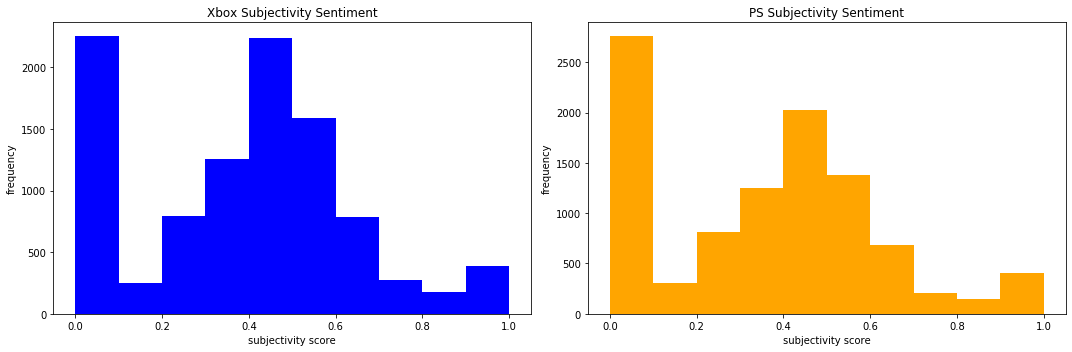

In [33]:
#Calculates the mean of the subjectivity scores
xbox_pol_mean = xbox_1['subjectivity'].mean()
ps_pol_mean = ps_1['subjectivity'].mean()
print(f'Average Xbox subjectivity: {xbox_pol_mean}')
print(f'Average PS subjectivity: {ps_pol_mean}')

#Visualizes Subjectivity
func.histogram([xbox_1, ps_1], ['Xbox Subjectivity Sentiment', 'PS Subjectivity Sentiment'], 'subjectivity', ['blue', 'orange'])

**Findings:** Posts from the PS subreddit tends to be slightly more objective. In contrast, posts from the Xbox subreddit are somewhat more subjective. This observation is interesting because I assumed that both subreddits would contain posts that lean towards strongly subjective, since Reddit's premise is to post your opinions. To sum this up, both subreddits include fact-based posts. However, the Xbox subreddit has more opinionated posts than PS. 